전이학습
  - CIFAR-10 학습에 오랜시간이 걸린다
  - 데이터가 달라질때마다 매변 새로운 학습을 해야 하는지?
  - 대규모 데이터로 사전 학습을 하고 소규모 데이터로 파리미터 조정만 하는 기법
  - ImageNet : 1천개의 사물에 대한 특징을 추출
  - VGG16모델

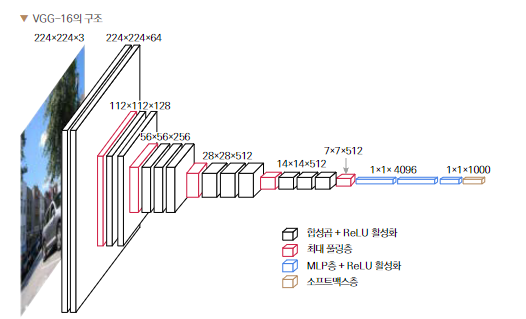

In [ ]:
import torch
import torch.nn as nn

from torchvision.models.vgg import vgg16

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
model = vgg16(weights=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:08<00:00, 64.9MB/s]


In [ ]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
model.classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)

In [ ]:
# 분류층 정의
fc = nn.Sequential(
    nn.Linear(in_features=25088, out_features=4096, bias=True),
    nn.ReLU(),
    nn.Dropout(),
    nn.Linear(in_features=4096, out_features=4096, bias=True),
    nn.ReLU(),
    nn.Dropout(),
    nn.Linear(in_features=4096, out_features=10, bias=True)
)
model.classifier = fc
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
model.to(device)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

모델 학습하기

In [ ]:
import tqdm
from torchvision.datasets.cifar import CIFAR10
from torchvision.transforms import Compose, ToTensor, Resize
from torchvision.transforms import RandomHorizontalFlip, RandomCrop, Normalize
from torch.utils.data.dataloader import DataLoader

In [ ]:
from torch.optim.adam import Adam

In [ ]:
transforms = Compose([
    Resize(224),
    RandomCrop((224,224), padding=4),
    RandomHorizontalFlip(p=0.5),
    ToTensor(),
    Normalize(mean=(0.49139968, 0.48215841, 0.44653091), std=(0.24703223, 0.24348513, 0.26158784))
])
training_data = CIFAR10(
    root = './',
    train = True,
    download = True,
    transform=transforms
)

test_data = CIFAR10(
    root = './',
    train = False,
    download = True,
    transform=transforms
)
from torch.utils.data import Subset
indices = torch.arange(1000)
training_data = Subset(training_data, indices)
test_data = Subset(test_data, indices)

train_loader = DataLoader(training_data,batch_size=32, shuffle = True)
test_loader = DataLoader(test_data,batch_size=32, shuffle = False)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
# # 데이터가 너무 많아서
# from torch.utils.data import Subset
# indices = torch.arange(1000)
# training_data = Subset(training_data, indices)
# len(training_data)

len(training_data), len(test_data)

(1000, 1000)

In [ ]:
# 학습루프
lr = 1e-4
optim = Adam(model.parameters(), lr=lr)
for epoch in range(10):
  # 학습로그 출력
  iterator = tqdm.tqdm(train_loader)  # 학습로그 출력
  for data, label in iterator:
    optim.zero_grad()
    preds = model(data.to(device)) # 모델의 예측값 출력

    loss = nn.CrossEntropyLoss()(preds, label.to(device))
    loss.backward()
    optim.step()

    # tqdm이 출력할 문자열
    iterator.set_description(f'epoch:{epoch+1} loss:{loss.item()}')

torch.save(model.state_dict(), "CIFAR_VGG16.pth")  # 모델 저장

epoch:10 loss:3.81729805667419e-05: 100%|██████████| 32/32 [00:16<00:00,  1.90it/s]


모델 성능 평가

In [ ]:
model.load_state_dict(torch.load("CIFAR_VGG16.pth",map_location=device))
num_corr = 0

with torch.no_grad():
  for data, label in test_loader:
    output = model(data.to(device))
    preds = output.data.max(1)[1]   # max  max값, 이때의 인덱스
    corr = preds.eq(label.to(device).data).sum().item()
    num_corr += corr
  print(f"Accuracy:{num_corr / len(test_data)}")

Accuracy:0.842


- ResNet 만들기
  - skip connection 을 사용하는 cnn 모델
  - VGG에 비해 훨씬 더 많은 층을 쌓는다

- 기울기소실 : 은닉층이 깊어지면 기울기가 0에 까까운 현상
- 배치 정규화 : 배치간의 차이를 정규화시켜서 더 안정되게 학습
- 스킵 커넥션 : 은닉층을 거치지 않은 입력값과 은닉층의 결과를 더하는 구조
- 평균 폴링 : 커널의 평균값을 이용하는 폴링  

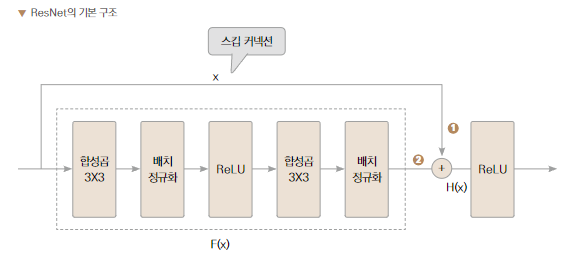

- 자기자신을 미분하면 기울기가 1이되기 때문에  신경망의 출력부분에 입력을 더하는 방식으로 기울기를 최소 1로 확보하는 기법

H(x) = F(x) + 1

- 학습이 쉬워진다
  - F(x) = H(x) - x   : 신경망에서 출력과 입력의 차이를 의미
- 스킵커넥션이 없는 학습은 H(x)의 최적화
- ResNet 은 F(x)의 최소화  즉 F(x)를 0으로 만든다

- 기존학습... 알수없는 지점인 최적화 점을 향해 간다.
- ResNet은 0이라는 뚜렷한 목표가 생김

- 배치정규화:
  - 배치단위로 학습, 배치간의 데이터 분포가 달라진다
  - 배치간의 데이터 불균형을 해결하는 기법
  - 각 층에서 값의 분포가 일정하도록 해주는 기법

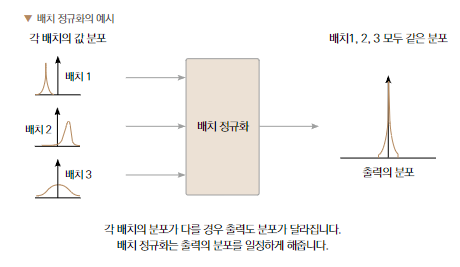

기본 블럭 정의

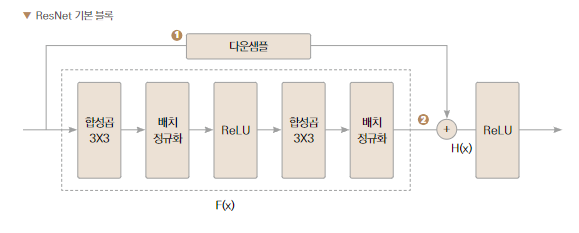

In [ ]:
import torch
import torch.nn as nn

In [ ]:
class BasicBlock(nn.Module):
  def __init__(self, in_channels, out_channels, kernel_size=3):
    super(BasicBlock, self).__init__()
    # 합성곱층 정의
    self.c1 = nn.Conv2d(in_channels,out_channels, kernel_size=kernel_size, padding=1)
    self.c2 = nn.Conv2d(out_channels,out_channels, kernel_size=kernel_size, padding=1)
    self.downsample = nn.Conv2d(in_channels, out_channels,kernel_size=1)

    # 배치 정규화층
    self.bn1 = nn.BatchNorm2d(num_features=out_channels)
    self.bn2 = nn.BatchNorm2d(num_features=out_channels)

    self.relu = nn.ReLU()

  # 기본블록의 순전파 정의
  def forward(self, x):
    # 스킵커넥션을 위해 초기 입력 저장
    X_ = x
    # ResNet 기본 블럭 F(x) 부분
    x = self.c1(x)
    x = self.bn1(x)
    x = self.relu(x)
    x = self.c2(x)
    x = self.bn2(x)
    # 합성곱의 결과와 입력의 채녈수를 맞춰
    X_ = self.downsample(X_)

    # 합성곱층의 결과와 저장했던 입력값을 더해줌(스킵 커넥션)
    x += X_
    x = self.relu(x)

    return x


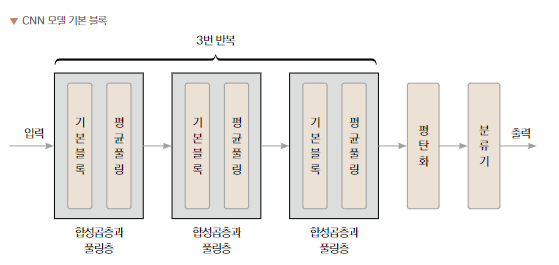

In [ ]:
class ResNet(nn.Module):
  def __init__(self, num_class = 10):
    super(ResNet, self).__init__()

    # 기본 블럭
    self.b1 = BasicBlock(in_channels=3, out_channels=64)
    self.b2 = BasicBlock(in_channels=64, out_channels=128)
    self.b3 = BasicBlock(in_channels=128, out_channels=256)

    # 폴링을 최대값이 아닌 평균
    self.pool = nn.AvgPool2d(kernel_size=2, stride=2)

    # 분류기
    self.fc1 = nn.Linear(in_features=4096, out_features=2048)
    self.fc2 = nn.Linear(in_features=2048, out_features=512)
    self.fc3 = nn.Linear(in_features=512, out_features=num_class)

    self.relu = nn.ReLU()
  def forward(self, x):
    # 기본블럭과 폴링층 통과   # 입력이미지가 32 32 3
    x = self.b1(x)     # 32 32 64
    x = self.pool(x)   # 16 16 64
    x = self.b2(x)     # 16 16 128
    x = self.pool(x)   # 8 8 128
    x = self.b3(x)    # 8 8 256
    x = self.pool(x)  # 4 4 256
    # 분류기의 입력으로 사용하기 위한 평탄화
    x = torch.flatten(x, start_dim=1)  # 4x4x256 = 4096

    # 분류기로 예측값을 출력
    x = self.fc1(x)
    x = self.relu(x)
    x = self.fc2(x)
    x = self.relu(x)
    x = self.fc3(x)

    return x

학습

In [ ]:
from torch.utils.data.dataloader import DataLoader
from torchvision.transforms import Normalize
from torch.optim.adam import Adam
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import torchvision.transforms as T
from torchvision.datasets.cifar import CIFAR10
from torchvision.transforms import Compose
from torchvision.transforms import RandomHorizontalFlip, RandomCrop

transforms = Compose([
    RandomCrop((32,32), padding=4),
    RandomHorizontalFlip(p=0.5),
    T.ToTensor(),
    Normalize(mean=(0.49139968, 0.48215841, 0.44653091), std=(0.24703223, 0.24348513, 0.26158784)),
])

training_data = CIFAR10(
    root = './',
    train = True,
    download = True,
    transform=transforms
)

test_data = CIFAR10(
    root = './',
    train = False,
    download = True,
    transform=transforms
)
train_loader = DataLoader(training_data,batch_size=32, shuffle = True)
test_loader = DataLoader(test_data,batch_size=32, shuffle = False)

model = ResNet(10)
model.to(device)

# 학습률 정의
lr = 1e-3

# 최적화 기법 정의
optim = Adam(model.parameters(), lr=lr)

# 학습루프
for epoch in range(2):
  for data, label in train_loader:
    optim.zero_grad() # 기울기 초기화

    preds = model(data.to(device)) # 모델의 예측

    # 오차역전파와 최적화
    loss = nn.CrossEntropyLoss()(preds, label.to(device))
    loss.backward()
    optim.step()
  if epoch ==0 or epoch%10 == 0:
    print(f'epoch{epoch+1} loss:{loss.item()}')

# 모델 저장
torch.save(model.state_dict(), 'CIFAR.pth')

Files already downloaded and verified
Files already downloaded and verified
epoch1 loss:0.9126228094100952


In [ ]:
model.load_state_dict(torch.load('CIFAR.pth'),map_location=device)
num_corr = 0

with torch.no_grad():
  for data, label in test_loader:
    output = model(data.to(device))
    preds = output.data.max(1)[1]
    corr = preds.eq(label.to(device).data).sum().item()
    num_corr += corr
  print(f'Accuracy:{num_corr / len(test_data)}')